Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce & how they can grow the business in different countries

1) What type of content is available in different countries?

2) How has the number of movies released per year changed over the last 20-30 years?

3) Comparison of tv shows vs. movies.

4) What is the best time to launch a TV show?

5) Analysis of actors/directors of different types of shows/movies.

6) Does Netflix has more focus on TV Shows than movies in recent years?

In [1]:
import pandas as pd

df = pd.read_csv("/content/sample_data/netflix.csv")

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Categorical columns
categorical_columns = ['type', 'rating', 'listed_in']
for col in categorical_columns:
  print(f"No.of unique values in {col}: \n{df[col].nunique()}\n")
  print(f"Value counts in {col}: \n{df[col].value_counts()}\n")

No.of unique values in type: 
2

Value counts in type: 
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

No.of unique values in rating: 
17

Value counts in rating: 
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

No.of unique values in listed_in: 
514

Value counts in listed_in: 
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedi

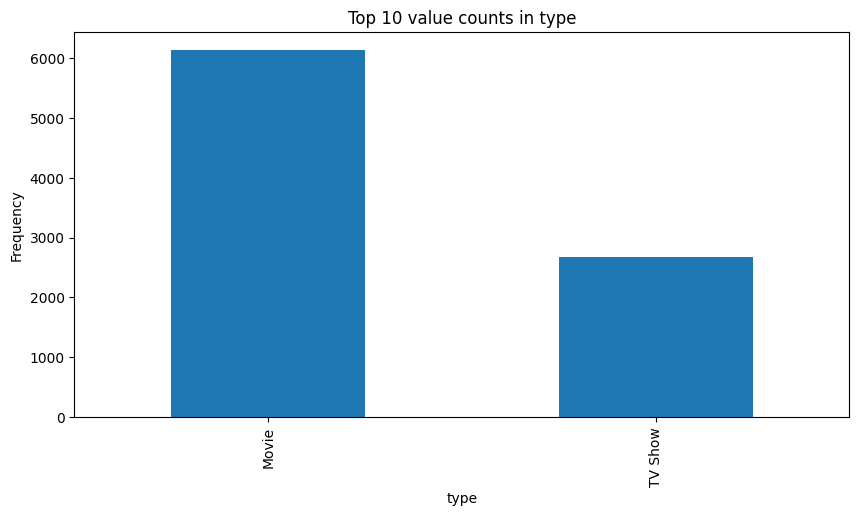

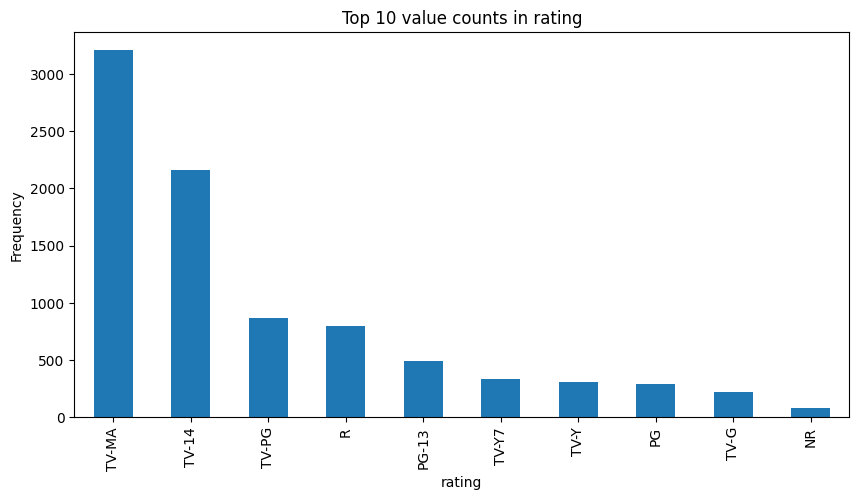

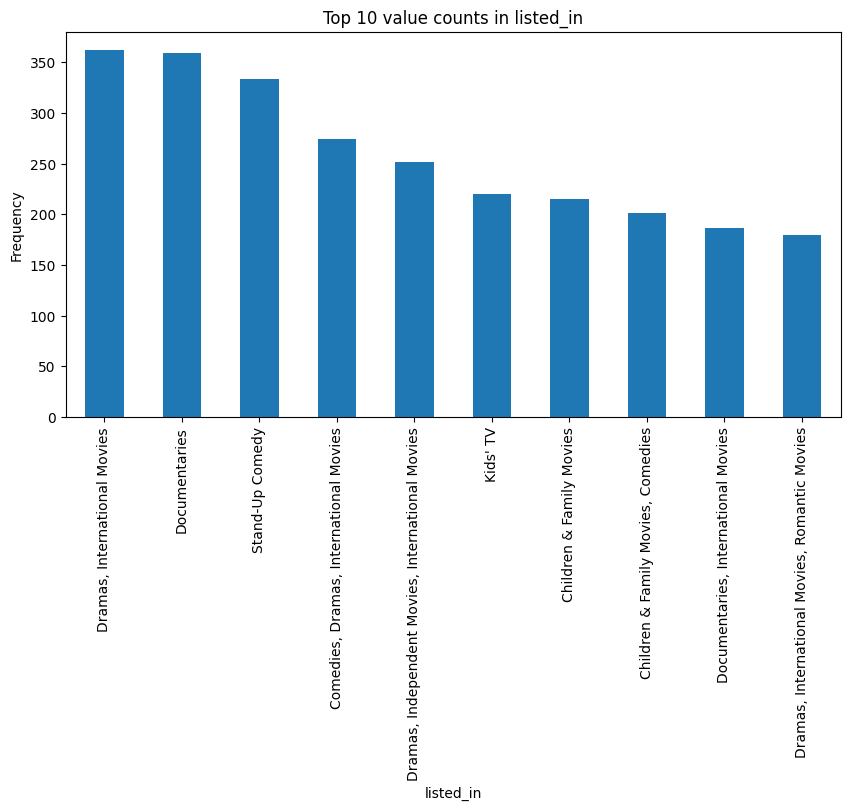

In [7]:
# Plot top 10 value counts in categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in categorical_columns:
  df[col].value_counts().nlargest(10).plot(kind='bar', figsize=(10, 5))
  plt.title(f"Top 10 value counts in {col}")
  plt.ylabel("Frequency")
  plt.xlabel(col)
  plt.show()

In [8]:
# Missing values - find % of missing values in each column
for col in df.columns:
  missing_vals = (df[col].isna().sum() / len(df)) * 100
  print(f"% of missing values in {col}: {missing_vals: .2f}")

% of missing values in show_id:  0.00
% of missing values in type:  0.00
% of missing values in title:  0.00
% of missing values in director:  29.91
% of missing values in cast:  9.37
% of missing values in country:  9.44
% of missing values in date_added:  0.11
% of missing values in release_year:  0.00
% of missing values in rating:  0.05
% of missing values in duration:  0.03
% of missing values in listed_in:  0.00
% of missing values in description:  0.00


In [9]:
# Change data type of categorical columns to 'category'
for col in categorical_columns:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 674.8+ KB


In [10]:
# Convert 'date_added' column to 'datetime' format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].isna().sum()

# Remove rows with invalid date format
df.dropna(subset='date_added', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   category      
 2   title         8709 non-null   object        
 3   director      6168 non-null   object        
 4   cast          7892 non-null   object        
 5   country       7882 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8705 non-null   category      
 9   duration      8706 non-null   object        
 10  listed_in     8709 non-null   category      
 11  description   8709 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 735.4+ KB


In [11]:
df.shape

(8709, 12)

In [12]:
# Extract month of year & year from 'date_added" column
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [13]:
df['year_added'].value_counts()

,count
year_added,
2019,1999
2020,1878
2018,1625
2021,1498
2017,1164
2016,418
2015,73
2014,23
2011,13


In [14]:
df['month_added'].value_counts()

,count
month_added,
7,819
12,797
9,765
4,759
10,755
8,749
3,734
1,727
6,724


In [15]:
df.groupby('year_added')['month_added'].value_counts()

# Sort the groupby values in descending order of year_added
df.groupby('year_added')['month_added'].value_counts().sort_index(ascending=False)

# Sort the groupby values in descending order of year_added & show the top 3 years only
df.groupby('year_added')['month_added'].value_counts().sort_index(ascending=False).groupby('year_added').head(3)

year_added  month_added
2021        9              183
            8              178
            7              257
2020        12             169
            11             154
            10             167
2019        12             212
            11             253
            10             191
2018        12             180
            11             154
            10             190
2017        12             115
            11              82
            10             125
2016        12              95
            11              42
            10              51
2015        12              18
            11               3
            10              14
2014        12               5
            11               4
            10               4
2013        12               2
            11               2
            10               2
2012        12               1
            11               1
            2                1
2011        10              11
            9                1
            5                1
2010        11               1
2009        11               1
            5                1
2008        2                1
            1                1
Name: count, dtype: int64

<Axes: xlabel='year_added'>

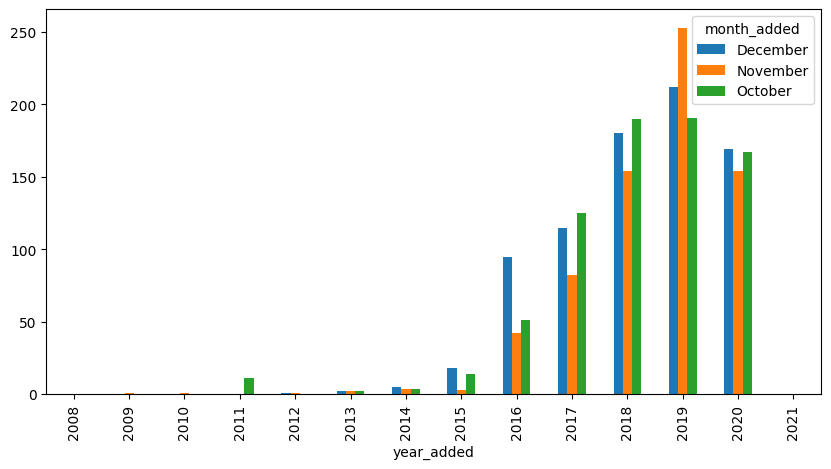

In [126]:
# Plot content added by year_added (last 5 years) & month_added
df.groupby('year_added')['month_added'].value_counts().sort_index(ascending=False).groupby('year_added').head(3).unstack().plot(kind='bar', figsize=(10, 5))

<ipython-input-127-ef4f75a29075>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='year_added', columns='month_added', values='show_id', aggfunc='count')


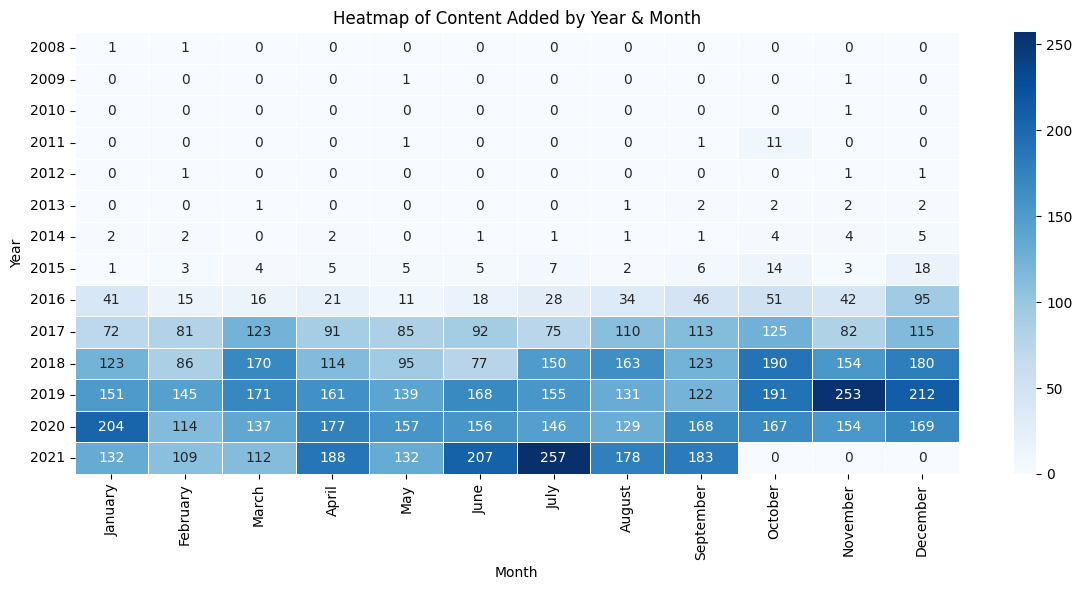

In [127]:
# Count titles by year & month
heatmap_data = df.pivot_table(index='year_added', columns='month_added', values='show_id', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Content Added by Year & Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

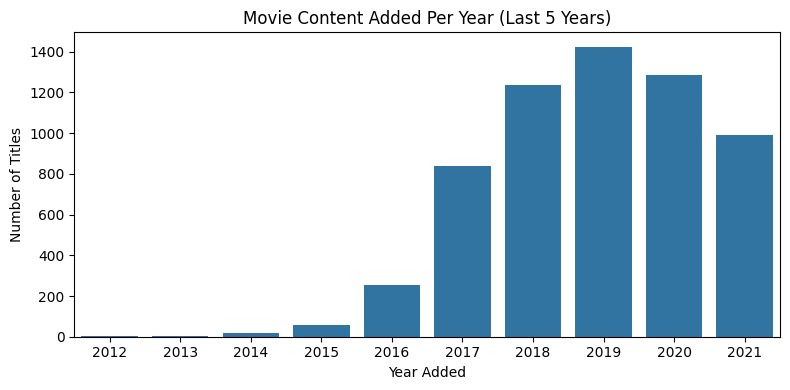

In [132]:
# Analyze - count of movie content added - in recent years
df_movies = df[df['type']=='Movie']

# Filter last 10 years
recent_years = df_movies[df_movies['year_added'] >= (df_movies['year_added'].max() - 9)]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=recent_years, x='year_added', order=sorted(recent_years['year_added'].unique()))
plt.title('Movie Content Added Per Year (Last 5 Years)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

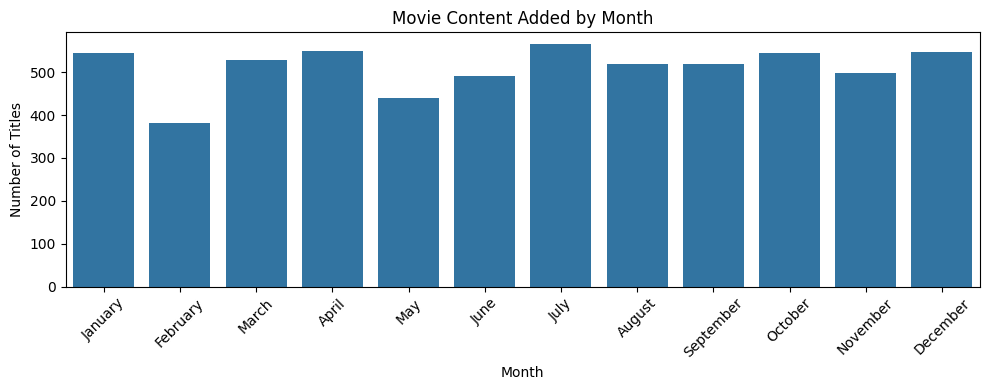

In [131]:
'''
# Optional: Use ordered categorical month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)
'''

# Plot
plt.figure(figsize=(10, 4))
sns.countplot(data=df_movies, x='month_added')
plt.title('Movie Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


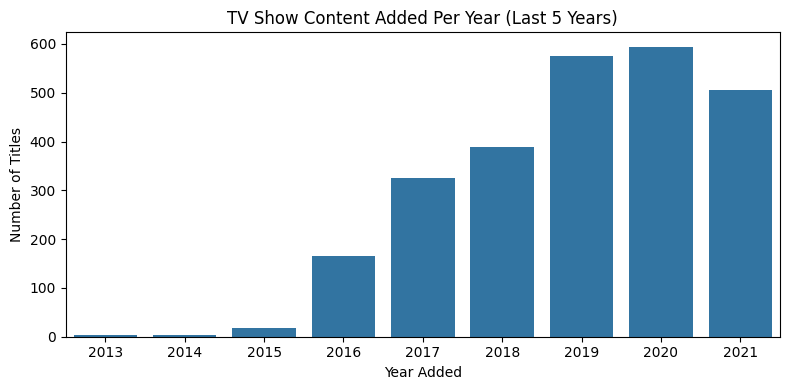

In [133]:
# Analyze - count of TV shows content added - in recent years
df_tvshows = df[df['type']=='TV Show']

# Filter last 10 years
recent_years = df_tvshows[df_tvshows['year_added'] >= (df_tvshows['year_added'].max() - 9)]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=recent_years, x='year_added', order=sorted(recent_years['year_added'].unique()))
plt.title('TV Show Content Added Per Year (Last 5 Years)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

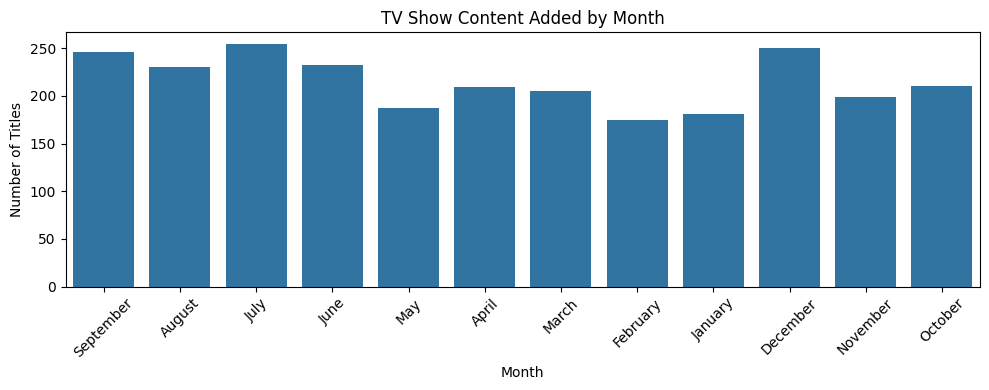

In [134]:
# Plot TV Show content added by month
plt.figure(figsize=(10, 4))
sns.countplot(data=df_tvshows, x='month_added')
plt.title('TV Show Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-135-b404b725965c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['type', 'month_added'])['show_id']


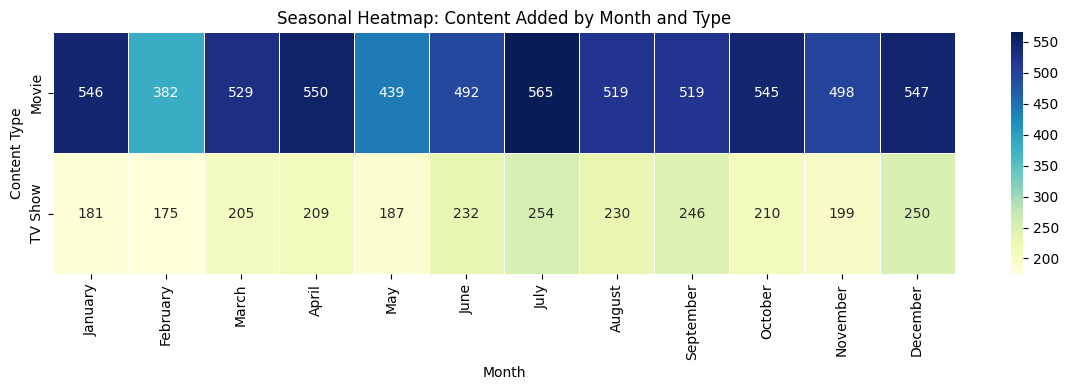

In [135]:
# A seasonal heatmap of month vs. type

# Extract month name from date
df['month_added'] = df['date_added'].dt.month_name()

# Ensure months are ordered correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

# Group and pivot to form heatmap structure
heatmap_data = (
    df.groupby(['type', 'month_added'])['show_id']
    .nunique()  # count unique titles
    .unstack(fill_value=0)  # type as rows, months as columns
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Seasonal Heatmap: Content Added by Month and Type')
plt.xlabel('Month')
plt.ylabel('Content Type')
plt.tight_layout()
plt.show()


Most new content additions are happening in Q4 every year (month 10, 11, 12 - Oct, Nov, Dec). This goes hand-in-hand with the holiday season (which includes Black Friday, Cyber Monday, Christmas).

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   category      
 2   title         8709 non-null   object        
 3   director      6168 non-null   object        
 4   cast          7892 non-null   object        
 5   country       7882 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8705 non-null   category      
 9   duration      8706 non-null   object        
 10  listed_in     8709 non-null   category      
 11  description   8709 non-null   object        
 12  month_added   8709 non-null   int32         
 13  year_added    8709 non-null   int32         
dtypes: category(3), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 803.4+ KB


In [17]:
df['director'].value_counts()

# Find how many content have single director
df[df['director'].str.contains(',') == False]

# Among the single director titles, find how many different directors & their value counts
df[df['director'].str.contains(',') == False].value_counts('director')

# Find how many content have multiple directors
df[df['director'].str.contains(',') == True]

# In content with multiple directors, split/ explode content by each director
df_exploded = df.assign(director=df['director'].str.split(',')).explode('director')

df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [18]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9513 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9513 non-null   object        
 1   type          9513 non-null   category      
 2   title         9513 non-null   object        
 3   director      6972 non-null   object        
 4   cast          8561 non-null   object        
 5   country       8636 non-null   object        
 6   date_added    9513 non-null   datetime64[ns]
 7   release_year  9513 non-null   int64         
 8   rating        9509 non-null   category      
 9   duration      9510 non-null   object        
 10  listed_in     9513 non-null   category      
 11  description   9513 non-null   object        
 12  month_added   9513 non-null   int32         
 13  year_added    9513 non-null   int32         
dtypes: category(3), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 875.7+ KB


In [19]:
df_exploded['director'].value_counts()

,count
director,
Rajiv Chilaka,22
Raúl Campos,18
Jan Suter,18
Suhas Kadav,16
Marcus Raboy,16
...,...
Zhang Yimou,1
Phillip Youmans,1
Pawan Kumar,1


In [20]:
# What to do with null values in 'director' column in exploded dataframe?
df_exploded['director'].isna().sum()

np.int64(2541)

In [21]:
# For directors only analysis, create a separate directors only dataframe after removing rows with na values in director column
#df_directors = df_exploded.dropna(subset='director').copy()
#df_directors.info()

In [22]:
df_exploded.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,9,2018
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,12,2019
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,2,2018
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",12,2016
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,2019


In [23]:
# Explode "cast" column which has list of actors which are comma separated
df_exploded['cast'] = df_exploded['cast'].str.split(',')
df_exploded = df_exploded.explode('cast')
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021


In [24]:
# Analyze the "cast" column values using value_counts
df_exploded['cast'].value_counts()

,count
cast,
Anupam Kher,39
Rupa Bhimani,37
Takahiro Sakurai,33
Julie Tejwani,30
Yuki Kaji,29
...,...
Odwa Gwanya,1
Sello Maake Ka-Ncube,1
Greteli Fincham,1


In [25]:
# By content type - movies, tv shows - find popular cast
#df_exploded.groupby('type')['cast'].value_counts()

# Find popular cast in content_type = "movies"
df_exploded[df_exploded['type'] == 'Movie']['cast'].value_counts()

,count
cast,
Anupam Kher,38
Rupa Bhimani,33
Om Puri,28
Alfred Molina,27
Paresh Rawal,27
...,...
Owen Joyner,1
Jack De Sena,1
Brady Reiter,1


In [26]:
# Find popular cast in "tv shows"
df_exploded[df_exploded['type'] == 'TV Show']['cast'].value_counts()

,count
cast,
Takahiro Sakurai,24
Yuki Kaji,18
Junichi Suwabe,18
Ai Kayano,17
Daisuke Ono,15
...,...
Seda Tosun,1
Mehmet Ali Tuncer,1
Asuman Çakır,1


In [27]:
# Find popular cast in "tv show" by country where its produced
df_exploded[df_exploded['type'] == 'TV Show'].groupby('country')['cast'].value_counts()

country                                   cast             
, South Korea                              Kim Sung-kyun       1
                                           Koo Kyo-hwan        1
                                           Son Suk-ku          1
                                          Jung Hae-in          1
Argentina                                  Gustavo Garzón      2
                                                              ..
United States, United Kingdom, Australia   Kathryn Drysdale    1
                                           Miriam Margolyes    1
                                           Richard Grieve      1
                                           Simone Craddock     1
                                          Jason Callender      1
Name: count, Length: 14354, dtype: int64

In [28]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021


In [29]:
# Find unique values in country column
df_exploded['country'].value_counts()

,count
country,
United States,21842
India,7947
Japan,2884
United Kingdom,2113
South Korea,1481
...,...
"United States, Taiwan",1
"Argentina, Italy",1
"Belgium, United Kingdom",1


In [30]:
# Split the country column which has comma separated values
df_exploded['country'] = df_exploded['country'].str.split(',')
df_exploded = df_exploded.explode('country')
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021


In [31]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88586 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       88586 non-null  object        
 1   type          88586 non-null  category      
 2   title         88586 non-null  object        
 3   director      67450 non-null  object        
 4   cast          87402 non-null  object        
 5   country       83174 non-null  object        
 6   date_added    88586 non-null  datetime64[ns]
 7   release_year  88586 non-null  int64         
 8   rating        88548 non-null  category      
 9   duration      88583 non-null  object        
 10  listed_in     88586 non-null  category      
 11  description   88586 non-null  object        
 12  month_added   88586 non-null  int32         
 13  year_added    88586 non-null  int32         
dtypes: category(3), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 7.8+ MB


In [32]:
df_exploded['country'].value_counts()

,count
country,
United States,25785
India,8228
United States,4335
United Kingdom,4065
Japan,3012
...,...
Vatican City,1
Afghanistan,1
Kazakhstan,1


In [33]:
# Find popular cast in Movies
df_exploded[df_exploded['type'] == 'Movie']['cast'].value_counts()

,count
cast,
Alfred Molina,84
Frank Langella,66
Salma Hayek,66
Liam Neeson,61
John Krasinski,60
...,...
Paulo Sánchez Lima,1
Carmela Barsamian,1
Santiago Saez,1


In [34]:
# Find popular cast in TV Show
df_exploded[df_exploded['type'] == 'TV Show']['cast'].value_counts()

# Find top 10 popular cast in TV show by country in "TV"
df_exploded[df_exploded['type'] == 'TV Show'].groupby('country')['cast'].value_counts().nlargest(10)

# Find top 3 popular cast in the top 3 countries in "Movie"
df_exploded[df_exploded['type'] == 'Movie'].groupby('country')['cast'].value_counts().nlargest(10)

country        cast             
India           Anupam Kher         36
                Paresh Rawal        26
                Om Puri             25
                Radhika Apte        25
               Shah Rukh Khan       25
               Akshay Kumar         24
                Boman Irani         23
                Kareena Kapoor      23
United States   Liev Schreiber      23
India           Naseeruddin Shah    22
Name: count, dtype: int64

In [35]:
df_exploded['cast'].isna().sum()

np.int64(1184)

In [36]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88586 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       88586 non-null  object        
 1   type          88586 non-null  category      
 2   title         88586 non-null  object        
 3   director      67450 non-null  object        
 4   cast          87402 non-null  object        
 5   country       83174 non-null  object        
 6   date_added    88586 non-null  datetime64[ns]
 7   release_year  88586 non-null  int64         
 8   rating        88548 non-null  category      
 9   duration      88583 non-null  object        
 10  listed_in     88586 non-null  category      
 11  description   88586 non-null  object        
 12  month_added   88586 non-null  int32         
 13  year_added    88586 non-null  int32         
dtypes: category(3), datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 7.8+ MB


In [37]:
df.shape

(8709, 14)

In [38]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021


In [39]:
# Analyze 'cast' column in df_exploded - what insights can we get from 'cast' column
df_exploded['cast'].value_counts()

# Find top 3 'cast' in the top 3 country where the content is produced
df_exploded.groupby('country')['cast'].value_counts().nlargest(3)

# Find the top 3 countries where most content is created
df['country'].value_counts().nlargest(3)

,count
country,
United States,2778
India,971
United Kingdom,403


In [40]:
# Find the top 3 countries where most content is created & find the top 3 actors (cast) in each of those 3 countries in df_exploded dataframe

df_exploded['country'] = df_exploded['country'].str.strip()  # removes leading/trailing spaces
df_exploded_movies_only = df_exploded[df_exploded['type'] == 'Movie']
df_exploded_tvshow_only = df_exploded[df_exploded['type'] == 'TV Show']

n = 5
#Step 1: Find Top 3 Countries with Most Content
top_countries = (
    #df_exploded_movies_only['country']
    df_exploded_tvshow_only['country']
    #df_exploded['country']
    .value_counts()
    .head(n)
    .index
    .tolist()
)
print("Top countries:", top_countries)

#Step 2: Filter Data for Only Top 3 Countries
#df_top_countries = df_exploded[df_exploded['country'].isin(top_countries)]
#df_top_countries = df_exploded_movies_only[df_exploded_movies_only['country'].isin(top_countries)]
df_top_countries = df_exploded_tvshow_only[df_exploded_tvshow_only['country'].isin(top_countries)]

m = 3
#Step 3: Find Top 3 Actors in Each of Those Countries
top_actors_by_country = (
    df_top_countries
    .groupby(['country', 'cast'])['show_id']  # use show_id to count unique appearances
    .count()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
    .groupby('country')
    .head(m)
)
top_actors_by_country = top_actors_by_country.reset_index(drop=True)

#Step 4: Find Top 3 Directors in Each of Those Countries
top_directors_by_country = (
    df_top_countries
    .groupby(['country', 'director'])['show_id']  # use show_id to count unique appearances
    .count()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
    .groupby('country')
    .head(m)
)
top_directors_by_country = top_directors_by_country.reset_index(drop=True)

print(f"\n\nTop {m} Actors in Each of the Top {n} Countries:\n")
print(top_actors_by_country.sort_values('country'))

print(f"\n\nTop {m} Directors in Each of the Top {n} Countries:\n")
print(top_directors_by_country)

Top countries: ['United States', 'Japan', 'United Kingdom', 'South Korea', 'Canada']


Top 3 Actors in Each of the Top 5 Countries:

           country                 cast  count
0           Canada           Robb Wells      8
1           Canada   John Paul Tremblay      7
2           Canada           Mike Smith      7
3            Japan     Takahiro Sakurai     22
4            Japan       Junichi Suwabe     17
5            Japan            Yuki Kaji     17
6      South Korea            Bae Doona      5
7      South Korea         Cho Seong-ha      5
8      South Korea          Kim Tae-hun      5
9   United Kingdom   David Attenborough     13
10  United Kingdom            Eric Idle      5
11  United Kingdom        Michael Palin      5
12   United States         Grey Griffin      9
13   United States        Kari Wahlgren      7
14   United States          Steven Yeun      7


Top 3 Directors in Each of the Top 5 Countries:

           country             director  count
0           Canad

In [41]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021


In [42]:
# Explode 'listed_in' column values which are comma separated
df_exploded['listed_in'] = df_exploded['listed_in'].str.split(',')
df_exploded = df_exploded.explode('listed_in')
df_exploded.head()

# Find top 3 countries (highest count of show_id) by content type & find top 3 genres in each


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


In [59]:
# ✅ Step 0: Start from exploded + cleaned df
df_genre_cleaned = df_exploded.copy()

# Clean and explode 'country'
df_genre_cleaned = df_genre_cleaned.dropna(subset=['country', 'listed_in'])
df_genre_cleaned['country'] = df_genre_cleaned['country'].str.split(', ')
df_genre_cleaned = df_genre_cleaned.explode('country')
df_genre_cleaned['country'] = df_genre_cleaned['country'].str.strip()

# Clean and explode 'listed_in'
df_genre_cleaned['listed_in'] = df_genre_cleaned['listed_in'].str.split(', ')
df_genre_cleaned = df_genre_cleaned.explode('listed_in')
df_genre_cleaned['listed_in'] = df_genre_cleaned['listed_in'].str.strip()

# ✅ Step 1: Find Top 3 Countries (by unique show_id) for 'Movie' type
df_movies_only = df_genre_cleaned[df_genre_cleaned['type'] == 'Movie']

top_countries_by_movies = (
    df_movies_only
    .groupby('country')['show_id']
    .nunique()
    .sort_values(ascending=False)
    .head(3)
    .reset_index(name='unique_show_count')
)

print("\nTop 3 countries by unique Movie count:\n", top_countries_by_movies)
top_country_names = top_countries_by_movies['country'].tolist()

# ✅ Step 2: Filter for top countries and find Top 3 Genres in each
df_top_countries = df_movies_only[df_movies_only['country'].isin(top_country_names)]

top_genres_by_movies = (
    df_top_countries
    .groupby(['country', 'listed_in'])['show_id']
    .nunique()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
    .groupby('country')
    .head(3)
    .reset_index(drop=True)
)

#✅ NOTE: A single movie can appear in multiple genre counts as we exploded the 'listed_in' column.
print("\nTop 3 genres in top countries (Movies only):\n")
print(top_genres_by_movies)


Top 3 countries by unique Movie count:
           country  unique_show_count
0   United States               2752
1           India                962
2  United Kingdom                534

Top 3 genres in top countries (Movies only):

          country             listed_in  count
0           India  International Movies    864
1           India                Dramas    662
2           India              Comedies    323
3  United Kingdom                Dramas    197
4  United Kingdom  International Movies    170
5  United Kingdom         Documentaries    128
6   United States                Dramas    835
7   United States              Comedies    680
8   United States         Documentaries    512


In [156]:
# ✅ Step 1: Find Top 3 Countries (by unique show_id) for 'TV Show' type
df_tvshows_only = df_genre_cleaned[df_genre_cleaned['type'] == 'TV Show']

top_countries_by_tvshows = (
    df_tvshows_only
    .groupby('country')['show_id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='unique_show_count')
)

print("\nTop 3 countries by unique TV Show count:\n", top_countries_by_tvshows)
top_country_names = top_countries_by_tvshows['country'].tolist()

# ✅ Step 2: Filter for top countries and find Top 3 Genres in each
df_top_countries = df_tvshows_only[df_tvshows_only['country'].isin(top_country_names)]

top_genres_by_tvshows = (
    df_top_countries
    .groupby(['country', 'listed_in'])['show_id']
    .nunique()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
    .groupby('country')
    .head(5)
    .reset_index(drop=True)
)

#✅ NOTE: A single movie can appear in multiple genre counts as we exploded the 'listed_in' column.
print("\nTop 3 genres in top countries (TV Shows only):\n")
print(top_genres_by_tvshows)


Top 3 countries by unique TV Show count:
           country  unique_show_count
0   United States                891
1  United Kingdom                253
2           Japan                195
3     South Korea                165
4          Canada                113

Top 3 genres in top countries (TV Shows only):

           country               listed_in  count
0           Canada                Kids' TV     58
1           Canada               TV Dramas     28
2           Canada             TV Comedies     27
3           Canada  International TV Shows     24
4           Canada          Crime TV Shows     14
5            Japan  International TV Shows    149
6            Japan            Anime Series    139
7            Japan                Kids' TV     28
8            Japan       Romantic TV Shows     21
9            Japan               TV Dramas     21
10     South Korea  International TV Shows    149
11     South Korea         Korean TV Shows    128
12     South Korea       Romantic TV

In [67]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


In [70]:
# Analyze 'rating' column in original dataframe
df['rating'].value_counts()

,count
rating,
TV-MA,3183
TV-14,2133
TV-PG,838
R,799
PG-13,490
TV-Y7,330
TV-Y,300
PG,287
TV-G,212


<Axes: xlabel='rating'>

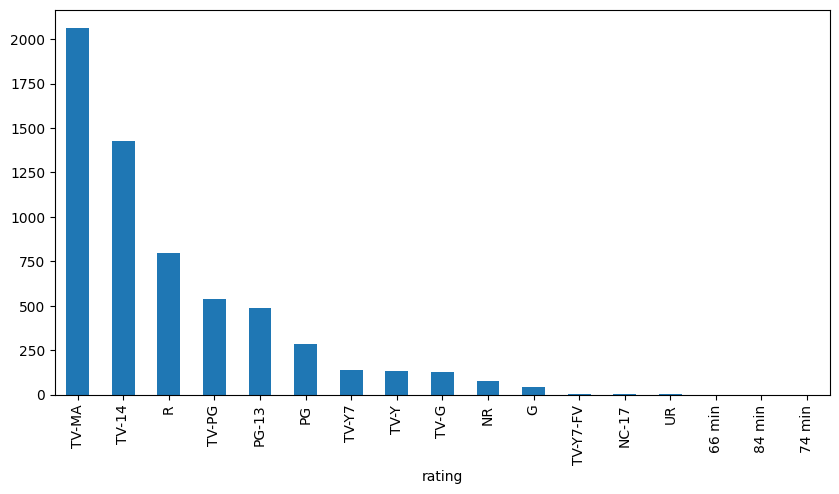

In [109]:
# Analyze 'rating' for 'Movie'
df[df['type'] == 'Movie']['rating'].value_counts()

# Plot 'rating' values
df[df['type'] == 'Movie']['rating'].value_counts().plot(kind='bar', figsize=(10, 5))


In [84]:
# Step 1: Clean and explode 'listed_in'
df_genres_by_rating = df.copy()
df_genres_by_rating = df_genres_by_rating.dropna(subset=['listed_in', 'rating'])

df_genres_by_rating['listed_in'] = df_genres_by_rating['listed_in'].str.split(', ')
df_genres_by_rating = df_genres_by_rating.explode('listed_in')
df_genres_by_rating['listed_in'] = df_genres_by_rating['listed_in'].str.strip()

top_genres_by_rating = (
    df_genres_by_rating
    .groupby(['rating', 'listed_in'])['show_id']
    .nunique()
    .reset_index(name='count')
    .sort_values(['rating', 'count'], ascending=[True, False])
    .groupby('rating')
    .head(3)
)

# Compute sum of top 3 genre counts per rating
rating_total = (
    top_genres_by_rating
    .groupby('rating')['count']
    .sum()
    .reset_index(name='total_top3_count')
)

# Merge and sort in a single step
top_genres_by_rating = (
    top_genres_by_rating
    .merge(rating_total, on='rating')
    .sort_values(by=['total_top3_count', 'count'], ascending=[False, False])
    .reset_index(drop=True)
)

print("Top 3 genres in each rating, sorted by total content volume and genre count:\n")
print(top_genres_by_rating[['rating', 'listed_in', 'count', 'total_top3_count']])


Top 3 genres in each rating, sorted by total content volume and genre count:

      rating                 listed_in  count  total_top3_count
0      TV-MA      International Movies   1130              2663
1      TV-MA                    Dramas    830              2663
2      TV-MA    International TV Shows    703              2663
3      TV-14      International Movies   1065              2225
4      TV-14                    Dramas    693              2225
5      TV-14    International TV Shows    467              2225
6          R                    Dramas    375               788
7          R        Action & Adventure    220               788
8          R        Independent Movies    193               788
9      TV-PG      International Movies    294               661
10     TV-PG                    Dramas    200               661
11     TV-PG             Documentaries    167               661
12     PG-13                    Dramas    192               508
13     PG-13              

<ipython-input-84-276a4401db4f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['rating', 'listed_in'])['show_id']
<ipython-input-84-276a4401db4f>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating')
<ipython-input-84-276a4401db4f>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating')['count']


<Axes: xlabel='rating'>

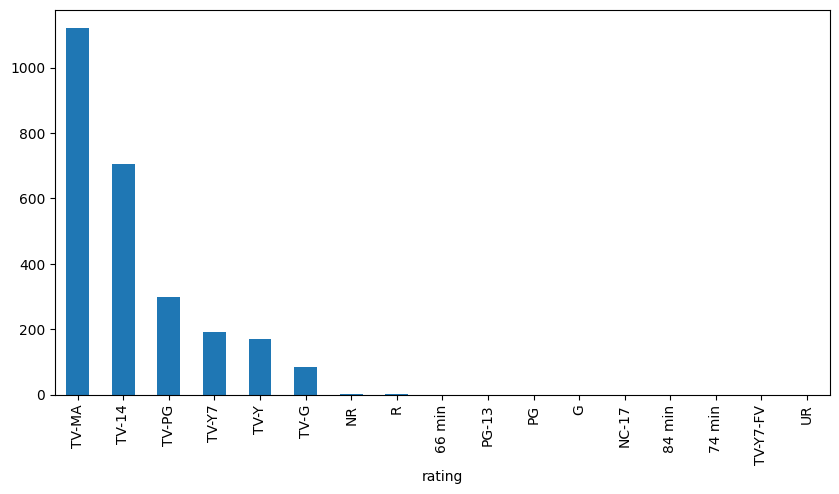

In [108]:
# Analyze 'rating' for 'TV Show'
df[df['type'] == 'TV Show']['rating'].value_counts()

# Plot 'rating' column
df[df['type'] == 'TV Show']['rating'].value_counts().plot(kind='bar', figsize=(10, 5))

In [88]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


In [91]:
# Analyze 'Duration' column
df_movies = df[df['type']=='Movie']
df_tvshows = df[df['type']=='TV Show']

df_movies['duration'].value_counts()

,count
duration,
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
...,...
228 min,1
18 min,1
205 min,1


In [102]:
# find median duration of movies
movie_duration = df_movies['duration'].str.extract(r'(\d+)').astype(float)
movie_duration.describe()


,0
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


In [92]:
df_tvshows['duration'].value_counts()

,count
duration,
1 Season,1791
2 Seasons,384
3 Seasons,178
4 Seasons,89
5 Seasons,55
6 Seasons,30
7 Seasons,18
8 Seasons,13
9 Seasons,8


TV Shows with 10 or more seasons:

390                       The Walking Dead
548                         Grey's Anatomy
1354                             Heartland
1622                         Stargate SG-1
1759    LEGO Ninjago: Masters of Spinjitzu
2203                      Shameless (U.S.)
2423                          Supernatural
4220                COMEDIANS of the world
4798                                  NCIS
4964                     Trailer Park Boys
5412                        Criminal Minds
5908      Danger Mouse: Classic Collection
Name: title, dtype: object


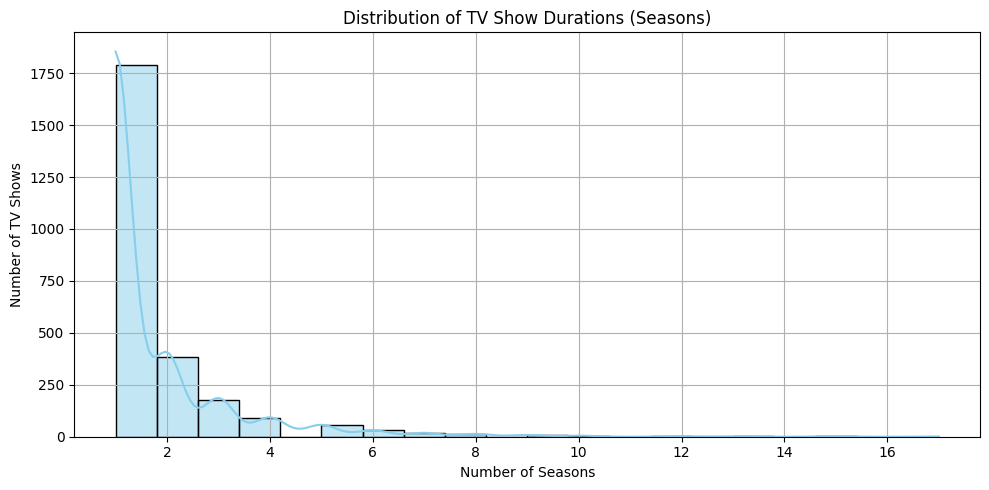

In [106]:
# List the 'title' of tv shows with more than 10 seasons

# Step 1: Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Step 2: Extract number of seasons from 'duration'
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Step 3: Filter shows with more than 10 seasons
long_running_shows = tv_shows[tv_shows['seasons'] > 9]

# Step 4: List the titles
print("TV Shows with 10 or more seasons:\n")
print(long_running_shows['title'])

# find median duration of tv shows
tv_duration = tv_shows['duration'].str.extract(r'(\d+)').astype(float)
tv_duration.describe()

# plot distribution of tv_distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(tv_duration[0], bins=20, kde=True, color='skyblue')

plt.title('Distribution of TV Show Durations (Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9,2021
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021


**Summary of analysis on Netflix Content dataset & my recommendations on new content to add:**

*   **Dataset:** The dataset contains 8,709 Netflix titles with 15 columns covering metadata like title, director, cast, country, genre, rating, duration, and release date.
*   **User liking:** While the dataset lacks user engagement metrics, a higher frequency of a content type being added may indicate user demand.
*   **Content Type:** There are 2 main types of content on Netflix: Movies (6K) & TV Shows (2.5K). In recent years (since 2019), the no.of TV shows added has been increasing year-on-year, while there has been a slight slump in no.of Movies added.
*   **Country of production - Movies:** The top 3 countries where movies are produced & added are: USA, India & UK. Followed by Canada, Spain & Egypt.
*   **Country of production - TV Shows:**The top 5 countries where tv shows are produced & added are: USA, UK, Japan, South Korea & India. Apart from USA & UK, the increasing TV shows content from non-english speaking countries like Japan, South Korea & India - shows an increasing user base or user liking to these content.
*   **Popular directors & actors** in top 3 countries of movies & tv shows content are identified. Add more content from these popular directors & actors (new or previous years content).
*   **Popular genres of movies** are - International Movies, Dramas & Comedies.
*   **Poppular genres of TV shows** are - Dramas, Kids & Crime apart from Comedies, International TV shows, Romance, Docuseries. Prioritize producing or acquiring TV Shows in the most added genres: Drama, Crime, and Kids TV, especially in non-english speaking countries like Japan, South Korea, and India.
*   **Average duration** of Movies is 98 minutes (median), while it is 1 season for TV shows (which scale based on season 1 performance).
*   **Based on rating**, we see most content in Movies & TV shows are targeted mainly for mature audience (17+ years). For younger audience, TV shows in "Kids TV" genre are being added.
*   **Release year & month** - Most of the content (Movies & TV shows) were added between years 2016 to 2021. July & December are the months with most new content being added, possibly aligning with the holiday season & prime day in USA.



**🎯 Recommendations**
*   📈 Invest more in TV Shows, especially in trending genres like Drama, Crime, and Kids TV

*   🌍 Expand regional content from Japan, South Korea, and India, particularly in local languages

*   🎬 Reacquire or promote content from popular actors and directors identified in top-performing countries

*   👪 Increase content variety in younger age brackets to build long-term user retention

*   📆 Use seasonal patterns to plan content drops in high-volume months like December and July

